In [1]:

from arquivo_preprocessado import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ("ignore")


In [2]:
X_train , X_test , y_train, y_test = preprocessing()

In [3]:
X_train.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
68355,625,5,29.0,2,False,True,True,False,False,True,False,True,False,False
79353,342,20,27.0,4,True,False,True,False,False,True,False,True,False,False
70521,2016,20,35.0,7,True,False,False,True,False,True,False,True,False,False
34921,1786,60,17.0,29,True,False,False,True,False,True,False,False,True,False
49121,531,30,15.0,13,True,False,True,False,False,True,False,True,False,False


In [4]:
def normalizacao(X_train, X_test):
    scaler = StandardScaler()
    scaler_fit = scaler.fit(X_train)
    X_train_norm = scaler_fit.transform(X_train)
    X_test_norm = scaler_fit.transform(X_test)
    return X_train_norm , X_test_norm, scaler_fit

In [5]:
X_train_norm ,X_test_norm, scaler = normalizacao(X_train, X_test)

In [6]:
X_train_norm

array([[-0.91364482, -1.34094047,  0.03172147, ...,  1.51384787,
        -0.99183125, -0.50048421],
       [-1.24661287, -0.3747277 , -0.12964793, ...,  1.51384787,
        -0.99183125, -0.50048421],
       [ 0.72295785, -0.3747277 ,  0.51582967, ...,  1.51384787,
        -0.99183125, -0.50048421],
       ...,
       [ 0.3252787 , -0.3747277 , -1.01717964, ..., -0.66056836,
        -0.99183125,  1.99806502],
       [-0.72068807,  0.91355599, -0.37170204, ..., -0.66056836,
         1.00823602, -0.50048421],
       [ 0.3252787 ,  0.91355599, -0.04896323, ..., -0.66056836,
         1.00823602, -0.50048421]])

In [7]:
def selecao(X_train , X_test , Y_train , Y_test): 
    X_rank = np.concatenate([X_train, X_test])
    Y_rank = np.concatenate([Y_train, Y_test])
    for model in [RandomForestClassifier,GradientBoostingClassifier,CatBoostClassifier]:
      cls = model()
      kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=7 )
      s = cross_val_score(cls, X_rank, Y_rank, scoring="accuracy", cv=kfold)
      print(f"{model.__name__:22} Score: "f"{s.mean():.3f} STD: {s.std():.2f}")

In [8]:
#X_train_dfnorm = pd.DataFrame(X_train_norm,columns=X_train.columns)
print(" Seleção de modelos:")
selecao (X_train_norm, X_test_norm, y_train, y_test)

 Seleção de modelos:
RandomForestClassifier Score: 0.823 STD: 0.00
GradientBoostingClassifier Score: 0.846 STD: 0.00
Learning rate set to 0.097814
0:	learn: 0.9819297	total: 206ms	remaining: 3m 26s
1:	learn: 0.8938125	total: 272ms	remaining: 2m 15s
2:	learn: 0.8234639	total: 323ms	remaining: 1m 47s
3:	learn: 0.7668623	total: 387ms	remaining: 1m 36s
4:	learn: 0.7197764	total: 450ms	remaining: 1m 29s
5:	learn: 0.6804689	total: 511ms	remaining: 1m 24s
6:	learn: 0.6473660	total: 563ms	remaining: 1m 19s
7:	learn: 0.6194994	total: 599ms	remaining: 1m 14s
8:	learn: 0.5952672	total: 622ms	remaining: 1m 8s
9:	learn: 0.5748033	total: 644ms	remaining: 1m 3s
10:	learn: 0.5568124	total: 667ms	remaining: 60s
11:	learn: 0.5414733	total: 693ms	remaining: 57.1s
12:	learn: 0.5277868	total: 715ms	remaining: 54.3s
13:	learn: 0.5159626	total: 741ms	remaining: 52.2s
14:	learn: 0.5056915	total: 765ms	remaining: 50.2s
15:	learn: 0.4972541	total: 788ms	remaining: 48.5s
16:	learn: 0.4890174	total: 809ms	remaini

In [25]:
def modelo (x_train , y_train):
   param_grid = {
    'random_state': [7],
    'depth': [10],
    'learning_rate': [0.1],
    'leaf_estimation_iterations': [10],
    'iterations': [500],
   }
   cat = CatBoostClassifier()
   Skfold = StratifiedKFold(n_splits=5,shuffle=True)
   grid_search = GridSearchCV(estimator = cat, param_grid = param_grid, 
                           cv = Skfold, n_jobs = -1, verbose = 3, return_train_score=True, scoring='accuracy')
   grid_search.fit(x_train, y_train)
   return grid_search

In [10]:
y_train.shape

(63886, 1)

In [11]:
X_train_norm.shape

(63886, 14)

In [26]:
modelo = modelo (X_train_norm,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.9371378	total: 225ms	remaining: 1m 52s
1:	learn: 0.8063706	total: 573ms	remaining: 2m 22s
2:	learn: 0.7093121	total: 1.14s	remaining: 3m 8s
3:	learn: 0.6417971	total: 1.32s	remaining: 2m 43s
4:	learn: 0.5900896	total: 1.82s	remaining: 3m
5:	learn: 0.5510576	total: 2.62s	remaining: 3m 35s
6:	learn: 0.5243218	total: 2.93s	remaining: 3m 26s
7:	learn: 0.5030197	total: 3.31s	remaining: 3m 23s
8:	learn: 0.4860782	total: 3.83s	remaining: 3m 28s
9:	learn: 0.4730703	total: 4.31s	remaining: 3m 31s
10:	learn: 0.4642109	total: 4.91s	remaining: 3m 38s
11:	learn: 0.4559039	total: 5.39s	remaining: 3m 39s
12:	learn: 0.4476856	total: 5.93s	remaining: 3m 42s
13:	learn: 0.4421426	total: 6.45s	remaining: 3m 43s
14:	learn: 0.4385782	total: 6.87s	remaining: 3m 42s
15:	learn: 0.4343986	total: 7.52s	remaining: 3m 47s
16:	learn: 0.4315142	total: 8s	remaining: 3m 47s
17:	learn: 0.4285682	total: 8.51s	remaining: 3m 47s
18:	learn: 0.4260269	to

In [27]:
resultado = modelo.cv_results_
mean = float (resultado['mean_test_score'])
dv = float (resultado['std_test_score'])
print(" Resultados Treinamento: " )
print("\n Resultados:\n", modelo.cv_results_   )
print("\n A melhor pontuação:\n", modelo.best_score_)
print('\n Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
print("\n Os melhores parâmetros:\n", modelo.best_params_)

 Resultados Treinamento: 

 Resultados:
 {'mean_fit_time': array([341.42175913]), 'std_fit_time': array([0.79044718]), 'mean_score_time': array([0.38134246]), 'std_score_time': array([0.09916091]), 'param_depth': masked_array(data=[10],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_iterations': masked_array(data=[500],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_leaf_estimation_iterations': masked_array(data=[10],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_random_state': masked_array(data=[7],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'depth': 10, 'iterations': 500, 'leaf_estimation_iterations': 10, 'learning_rate': 0.1, 'random_state': 7}], 'split0_test_score': array([0.84128972]), 'split1_test_scor

In [36]:
def metrica(y_test):
    yhat = modelo.predict(X_test)
    Acuracia = accuracy_score(y_test,yhat)
    Matrix = confusion_matrix(y_test,yhat)
    Report = classification_report(y_test,yhat)
    return Acuracia , Matrix , Report

In [37]:
Acuracia , Matrix, Report = metrica (y_test)

In [38]:
print("Acurácia:", Acuracia)
print("Matrix de Confusão:\n", Matrix)
print("Relatório de Classificação:\n", Report)

Acurácia: 0.8127347858752817
Matrix de Confusão:
 [[12903     0   433]
 [ 2049     0   179]
 [  330     0    78]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     13336
           1       0.00      0.00      0.00      2228
           2       0.11      0.19      0.14       408

    accuracy                           0.81     15972
   macro avg       0.32      0.39      0.35     15972
weighted avg       0.71      0.81      0.76     15972



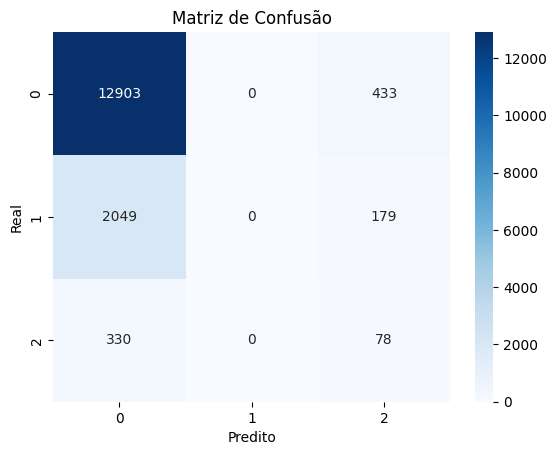

In [43]:
sns.heatmap(Matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

#### Claramente nota ser necessário ser realizado um trabalho de engenharia de recurso de balanceamento de target para obter melhor métrica para as classes de menor quantidade.
 